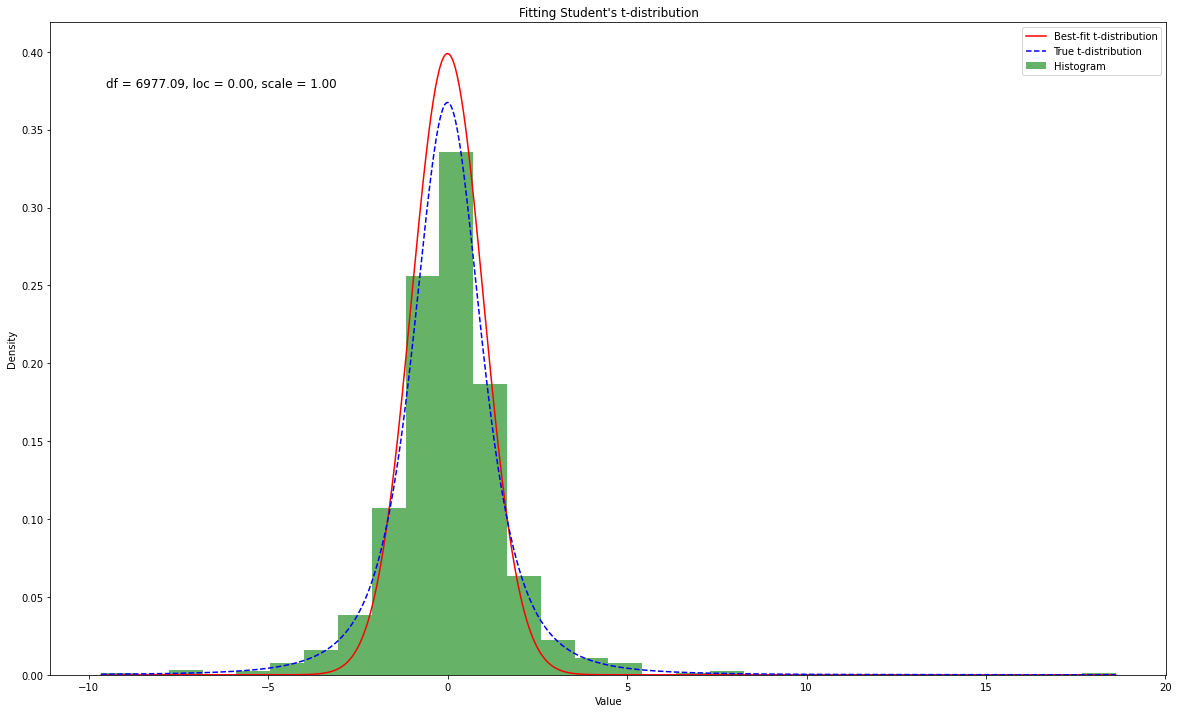

In [9]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from scipy.optimize import curve_fit
from _2_csv_data_parse import get_exchange

# path========================================================================================
assets_list = [
    '1沪A_不包括科创板', # 1698
    '2深A_不包括创业板', # 1505
    '3科创板', # 569
    '4创业板', # 1338
    '5北A_新老三板', # 244
    #'6上证股指期权',
    #'7深证股指期权',
]

modpath = os.getcwd()
csv_path = f'{modpath}/../data/'
log = f'{modpath}/logfile.txt'
assets_path_list = [csv_path + asset for asset in assets_list]

# API parsing=================================================================================
def parse_csv_metadata(show_progress=True, type='equity'):
    extracted_rows = []
    index_info = []
    # for assets_path in assets_path_list:
    #     assets = assets_path.split('/')[-1]
    #     for asset_csv_name in tqdm(os.listdir(assets_path), desc=f'{assets}'):
    #         if asset_csv_name.endswith('.txt'):
    #             asset_csv_path = os.path.join(assets_path, asset_csv_name)
    #             num_lines = sum(1 for _ in open(asset_csv_path, encoding='gbk'))
    #             if(num_lines<10):
    #                 continue
    #             lines_to_read = [0, 2, num_lines - 2]  # 1st, 3rd, the 2nd_last line
    #             lines = pd.read_csv(asset_csv_path, encoding='gbk', sep='\s+', skiprows=lambda x: x not in lines_to_read, header=None)
    #             if len(lines) > 2:
    #                 pass
    #                 # extracted_rows.append([             # line1 = [600000 浦发银行 日线 后复权]
    #                 #     asset_csv_name.split('.')[0],   # 'asset_file_name'
    #                 #     lines.iloc[0, 0],               # 'code'
    #                 #     get_exchange(lines.iloc[0, 0]), # 'exchange'
    #                 #     lines.iloc[0, 1],               # 'symbol'
    #                 #     lines.iloc[1, 0].split(',')[0], # 'start_date'
    #                 #     lines.iloc[2, 0].split(',')[0], # 'end_date'
    #                 #     ])
    #                 # index_info.append([asset_csv_path, num_lines])

    # Generate some sample data from a t-distribution
    np.random.seed(0)
    data = t.rvs(df=3, size=1000)

    # Define the PDF (probability density function) of a t-distribution
    def t_pdf(x, df, loc, scale):
        return t.pdf(x, df, loc=loc, scale=scale)

    # Fit the sample data to the t-distribution
    params, cov = curve_fit(t_pdf, data, norm.pdf(data), p0=[3, np.mean(data), np.std(data)])

    plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

    # Plot the histogram of the data
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

    # Plot the best-fit t-distribution function
    x = np.linspace(min(data), max(data), 1000)
    plt.plot(x, t_pdf(x, *params), 'r-', label='Best-fit t-distribution')

    # Plot the true t-distribution used to generate the sample data
    plt.plot(x, t_pdf(x, df=3, loc=0, scale=1), 'b--', label='True t-distribution')

    fit_params_str = f"df = {params[0]:.2f}, loc = {params[1]:.2f}, scale = {params[2]:.2f}"
    plt.text(0.05, 0.9, fit_params_str, transform=plt.gca().transAxes, fontsize=12)

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Fitting Student\'s t-distribution')
    plt.legend()
    plt.show()

parse_csv_metadata()